In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

# HR Analysis Case Study


В этом наборе данных представлены сведения о работниках некоторой компании. Для каждого сотрудника указано:
- id - его идентификатор
- department - отдел
- region - регион
- education - ступень образования
- gender - пол
- recruitment_channel - канал найма
- no_of_trainings - количество пройденных тренингов
- age -  возраст
- previous_year rating - рейтинг сотрудника за прошлый год
- length_of_service - стаж работы
- KPIs_met > 80 % - ключевые показатели эффективности выше 80 % ? 
- awards_won ? - выигрывал ли награды?
- avg_training_score - средний балл на тренингах 
- is_promoted - был ли повышен в должности?

Задача: построить модель, предсказывающую на основе текущих данных, был ли он повышен в должности.

In [4]:
data = pd.read_csv('train.csv')
data.shape

(54808, 14)

In [5]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [7]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [16]:
data.index

RangeIndex(start=0, stop=54808, step=1)

In [18]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Рассмотрим поло-возрастной состав компании

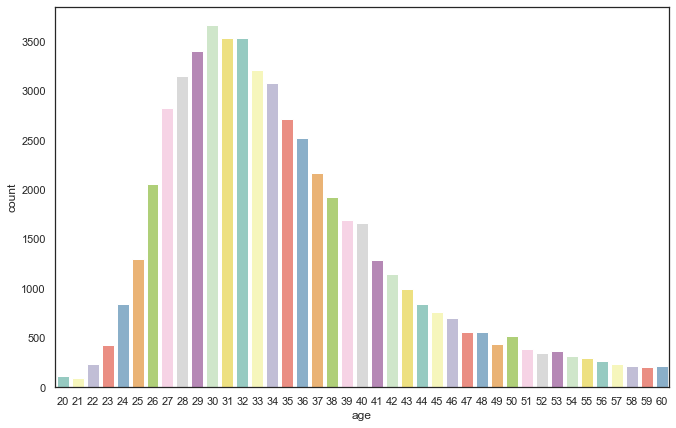

In [63]:
sns.countplot(x='age', data=data, palette="Set3")
pass

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


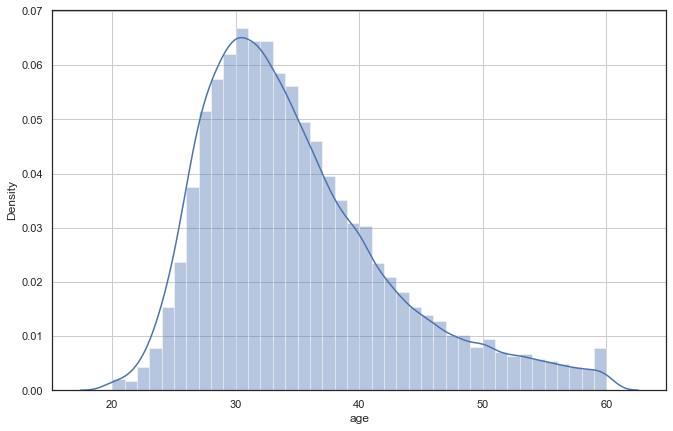

In [73]:
sns.distplot(data['age'], bins=40)
plt.grid()
pass

In [67]:
data['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

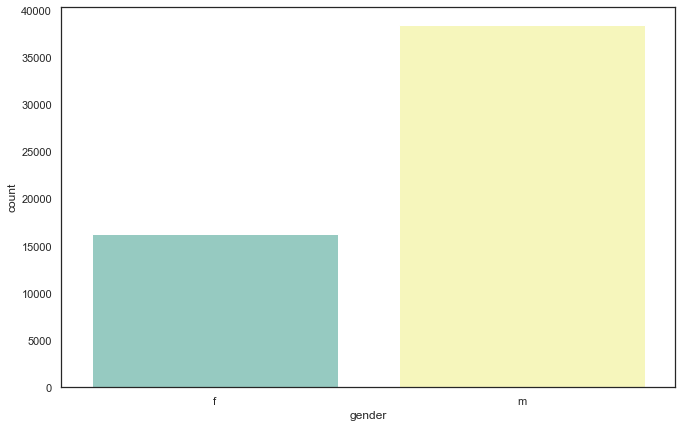

In [64]:
sns.countplot(x='gender', data=data, palette="Set3")
pass

Сотрудников-мужчин почти в 2.4 раза больше, чем сотрудников-женщин.

Обратимся к уровню образования сотрудников.

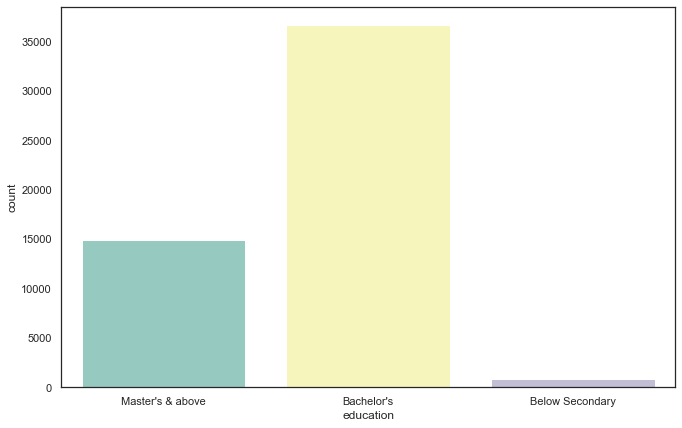

In [78]:
sns.countplot(x='education', data=data, palette="Set3")
pass

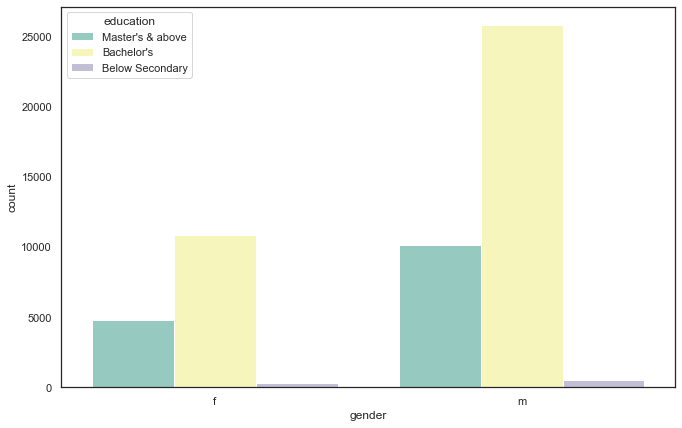

In [81]:
sns.countplot(x='gender', hue = 'education', data=data, palette="Set3")
pass

Для женщин и мужчин распредление уровней образования почти одинаковое (с поправкой на количество тех и других)

Найдем самого часто встрещающегося сотрудника в компании:

In [76]:
data[['department','gender','education', 'age']].mode()

,department,gender,education,age
0,Sales & Marketing,m,Bachelor's,30


Построим диаграмму занятости по отраслям

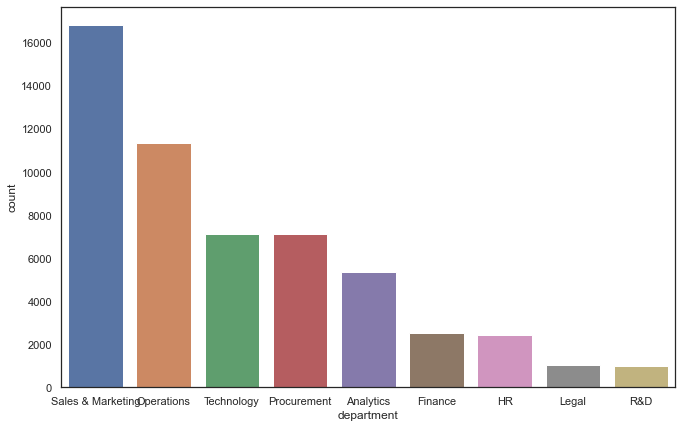

In [22]:
sns.countplot(x='department', order=data['department'].value_counts().index,  data=data)
pass

Наибольшее число сотрудников компании занято в продажах и маркетинге. Следующий за ним по численности отдел - управления операциями (операционный менеджмемнт) - отдел отвечающий за контроль эффективности производства и товаров и услуг. 
Самыми немногочисленными отделами же являются юридический и исследования и разработки. 
Посмотрим на распределение возрастов по каждому отделу

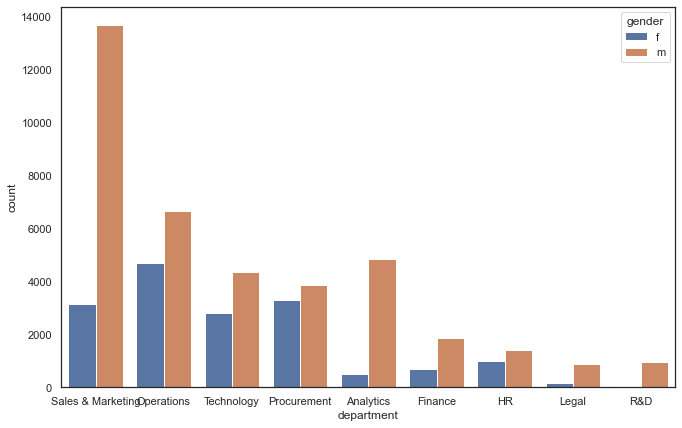

In [83]:
sns.countplot(x='department', order=data['department'].value_counts().index, hue ='gender',  data=data)
pass

In [101]:
data[data['department'] == 'R&D']['gender'].value_counts()

m    942
f     57
Name: gender, dtype: int64

За счет большего количество мужчин в компании, в каждом отделе преобладают сотрудники мужчины. В отделе закупок и службе HR количество женщин приближается к количеству мужчин. В юридическом и R&D женщины почти отсутствуют.

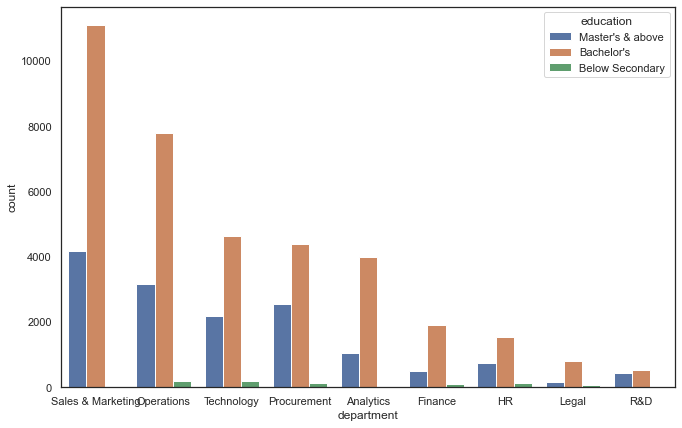

In [84]:
sns.countplot(x='department', order=data['department'].value_counts().index, hue ='education',  data=data)
pass

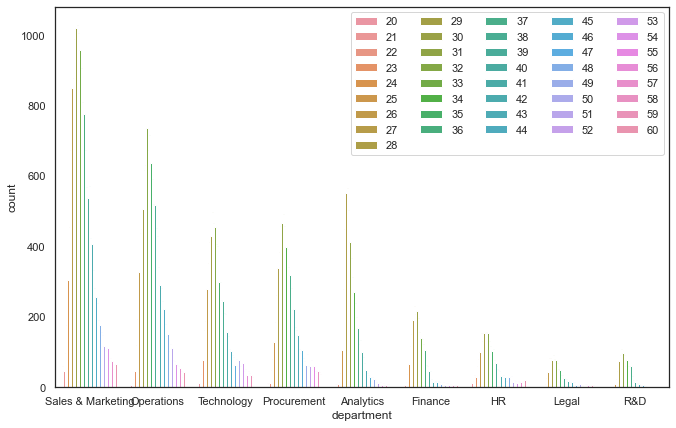

In [27]:
sns.countplot(x='department', order=data['department'].value_counts().index, hue = 'age', data=data)
plt.legend(ncol=5, loc='upper right')
pass

В каждом отделе преобладает число сотрудников среднего возраста. Найдем медианы и моды возрастов по отделам.

In [51]:
data['age'].mean()

34.80391548679025

In [50]:
data[['department', 'age']].mode()

,department,age
0,Sales & Marketing,30


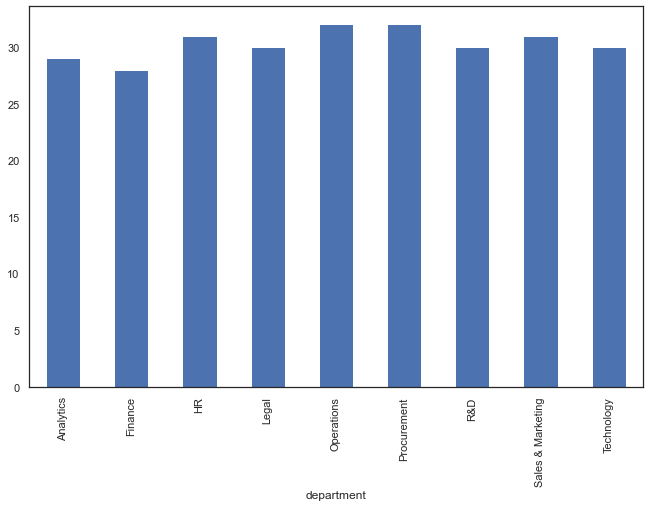

In [61]:
data.groupby('department')['age'].agg(pd.Series.mode).plot.bar()
pass

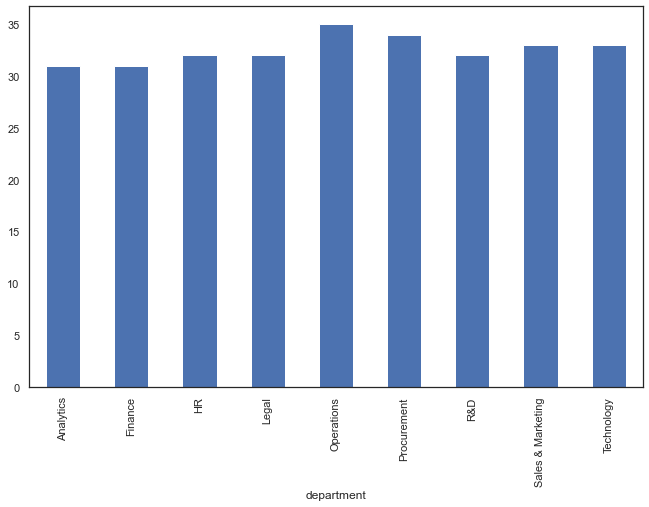

In [59]:
data.groupby('department')['age'].agg(pd.Series.median).plot.bar()
pass

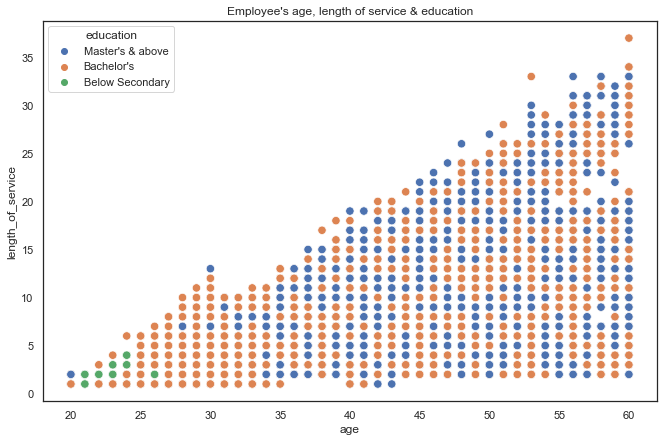

In [15]:
sns.set(style = 'white', r
        c={'figure.figsize':(11, 7)}, palette ='deep')
# adding a matplotlib parameters to seaborn functions
sns.scatterplot(data=data, x='age', y='length_of_service',  hue='education', s=70) 
plt.title("Employee's age, length of service & education")
pass

#### There are two different ways to do the same things

In [84]:
data.groupby('department')['employee_id'].count()

department
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
Operations           11348
Procurement           7138
R&D                    999
Sales & Marketing    16840
Technology            7138
Name: employee_id, dtype: int64

In [85]:
data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

## Filling null values

In [88]:
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [63]:
data.fillna(data.median(axis = 0), axis = 0, inplace = True)

In [64]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [65]:
data['education'].fillna(data['education'].mode().iloc[0], inplace = True)

In [66]:
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64